In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\temperature_data (1).csv")

In [3]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [4]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [7]:
df.duplicated().sum()

0

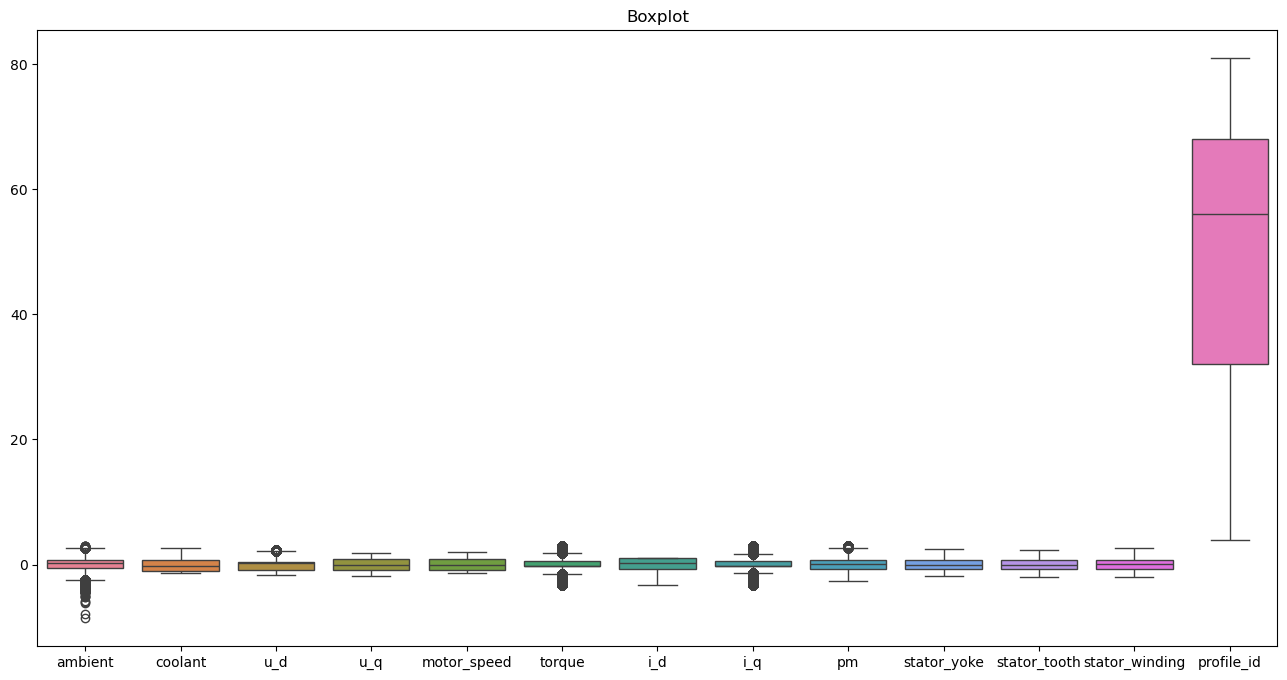

In [8]:

# Create boxplots for multiple variables
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)  
plt.title('Boxplot')
plt.show()

In [9]:

# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

In [10]:

# Convert to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)


         ambient   coolant       u_d       u_q  motor_speed    torque  \
0       0.677737  0.076232  0.504645  0.154203     0.043909  0.486533   
1       0.676080  0.076582  0.505085  0.154250     0.043909  0.486698   
2       0.675073  0.076665  0.505875  0.153118     0.043909  0.486651   
3       0.675242  0.076644  0.506112  0.153110     0.043908  0.486776   
4       0.675840  0.076642  0.506495  0.152764     0.043909  0.486766   
...          ...       ...       ...       ...          ...       ...   
998065  0.738793  0.434238  0.505545  0.168360     0.043909  0.485675   
998066  0.738676  0.428938  0.505603  0.167118     0.043906  0.485675   
998067  0.739239  0.425846  0.505411  0.168158     0.043908  0.485675   
998068  0.739491  0.424539  0.505421  0.167432     0.043908  0.485675   
998069  0.739113  0.427134  0.505381  0.168230     0.043908  0.485675   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       0.992717  0.494864  0.019807     0.000762      0

In [11]:
#  Calculate Q1 and Q3
Q1 = df.quantile(0.25)  # 25th percentile
Q3 = df.quantile(0.75)  # 75th percentile


In [12]:

#  Compute IQR
IQR = Q3 - Q1


In [13]:

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [14]:

# Step 4: Identify and filter out outliers
df_cleaned = df[(df >= lower_bound) & (df <= upper_bound)]


In [15]:
# Print results

print("\nLower Bound:", lower_bound, "Upper Bound:", upper_bound)
print("\nData without Outliers:\n", df_cleaned)



Lower Bound: ambient           -2.528476
coolant           -3.570876
u_d               -2.603633
u_q               -3.597413
motor_speed       -3.660105
torque            -1.488049
i_d               -3.411703
i_q               -1.392062
pm                -2.701806
stator_yoke       -2.914180
stator_tooth      -3.063236
stator_winding    -2.902545
profile_id       -22.000000
dtype: float64 Upper Bound: ambient             2.615766
coolant             3.183660
u_d                 2.135766
u_q                 3.522648
motor_speed         3.561797
torque              1.768302
i_d                 3.669382
i_q                 1.634053
pm                  2.710190
stator_yoke         2.864259
stator_tooth        3.073524
stator_winding      2.902584
profile_id        122.000000
dtype: float64

Data without Outliers:
          ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.3

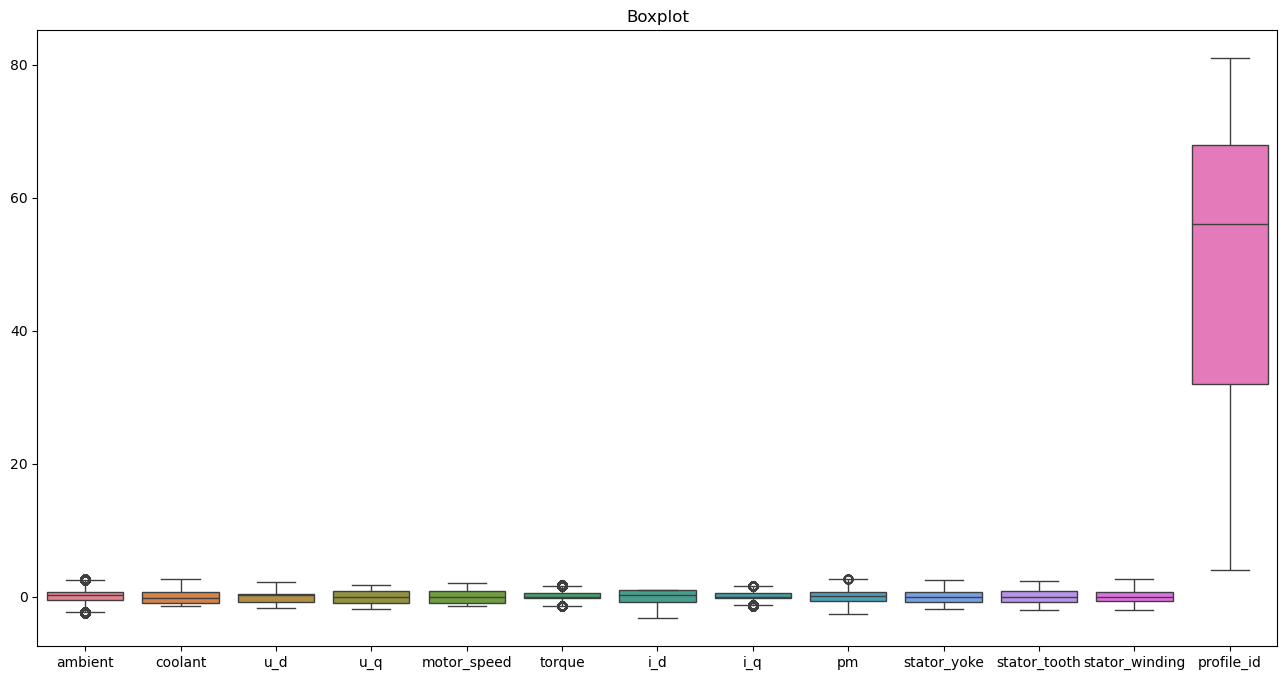

In [16]:
# Create boxplots for multiple variables
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned)  
plt.title('Boxplot')
plt.show()

In [17]:
# Count NaN values per column
print(df_cleaned.isna().sum())


ambient            38492
coolant                0
u_d                18050
u_q                    0
motor_speed            0
torque            127303
i_d                    0
i_q               148535
pm                  1501
stator_yoke            0
stator_tooth           0
stator_winding         0
profile_id             0
dtype: int64


In [18]:
# Replace NaN values with the mean of the column
data = df_cleaned.fillna(df_cleaned.mean())



In [19]:
# Count NaN values per column
print(data.isna().sum())


ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64


In [20]:

# Compute the correlation matrix
corr_matrix = data.corr()


In [21]:
# Get the indices of the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

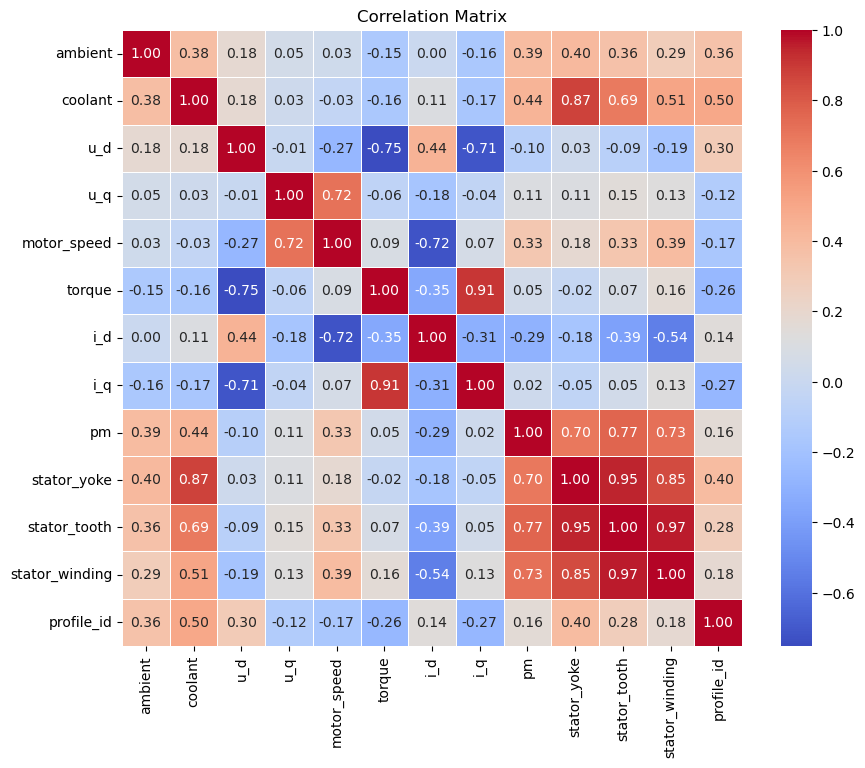

In [22]:

# Plot the heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Set a threshold to detect high correlation
threshold = 0.8

In [24]:
# Find pairs of features with correlation above the threshold
collinear_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > threshold)]


In [25]:

# List the correlated pairs and remove them
to_remove = set()

for feature in collinear_features:
    correlated_features = upper_triangle.index[abs(upper_triangle[feature]) > threshold].tolist()
    for correlated_feature in correlated_features:
        # For each pair, you can choose to drop one feature
        # Here, we are removing the second feature in the pair
        to_remove.add(correlated_feature)


In [26]:

# Remove the highly correlated features from the DataFrame
df_cleaned = df.drop(columns=to_remove)


In [27]:
# Check the cleaned data
print("Removed features:", to_remove)
print("Shape of data after removal:", df_cleaned.shape)

Removed features: {'stator_yoke', 'torque', 'coolant', 'stator_tooth'}
Shape of data after removal: (998070, 9)


In [28]:
# Features and target
X = data[['ambient','u_d','u_q', 'i_d', 'i_q', 'pm','stator_winding']]
y = data['motor_speed']


In [29]:
# Step 1: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Step 2: Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
# Step 3: Predict motor speed on the test set
y_pred = model.predict(X_test)


In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0870
Root Mean Squared Error: 0.2950
R² Score: 0.9131


In [34]:
# Define parameter grids for Ridge and Lasso regression
ridge_params = {"alpha": [0.1, 1, 10, 100, 1000]}
lasso_params = {"alpha": [0.001, 0.01, 0.1, 1, 10]}


In [35]:

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()


In [36]:

# Grid search for Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, scoring="neg_mean_squared_error", cv=5)
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [37]:
# Grid search for Lasso
lasso_grid = GridSearchCV(lasso, lasso_params, scoring="neg_mean_squared_error", cv=5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [38]:
# Ridge results
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)


In [39]:
print("Best Ridge Alpha:", ridge_grid.best_params_["alpha"])
print("Ridge RMSE:", ridge_rmse)
print("Ridge R²:", ridge_r2)


Best Ridge Alpha: 1
Ridge RMSE: 0.29502046779722874
Ridge R²: 0.9131470423013632


In [40]:

# Lasso results
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)


In [41]:

print("Best Lasso Alpha:", lasso_grid.best_params_["alpha"])
print("Lasso RMSE:", lasso_rmse)
print("Lasso R²:", lasso_r2)


Best Lasso Alpha: 0.001
Lasso RMSE: 0.29505145785678094
Lasso R²: 0.9131287946203246


In [44]:
models_and_params = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [10, 50 ],
            "max_depth": [3, 5],
            "min_samples_split": [2, 3],
            "min_samples_leaf": [2, 3]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
}

In [45]:

results = []

for name, mp in models_and_params.items():
    print(f"Training {name}...")

    # Use RandomizedSearchCV for faster execution
    search = RandomizedSearchCV(
        estimator=mp["model"], 
        param_distributions=mp["params"],  # Use param_distributions instead of param_grid
        scoring="neg_mean_squared_error",
        cv=2, 
        verbose=2,  # Show progress updates
        n_jobs=1,  #  CPU cores
        n_iter=2,  # Limit the number of random searches (reduce if still slow)
        random_state=42
    )
    
    search.fit(X_train, y_train)
    
    # Get best model and predictions
    best_model = search.best_estimator_
    predictions = best_model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results.append({
        "Model": name,
        "Best Parameters": search.best_params_,
        "RMSE": rmse,
        "R²": r2
    })

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)
print(results_df)

Training RandomForest...
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=  12.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=  12.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time= 1.1min
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time= 1.1min
Training GradientBoosting...
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time= 3.5min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time= 3.5min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time= 3.5min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time= 3.5min
              Model                                    Best Parameters  \
0      RandomForest  {'n_estimator